In [140]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

importando as bibliotecas que serao usadas para limpeza dos dados

In [141]:
df = pd.read_csv('HousingData.csv')
print("arquivo correto")
df.head()

arquivo correto


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Nossa base de dados contem no total de 14 colunas
CRIM = Taxa de criminalidade,
ZN =  Zona residencial com lotes grandes,
INDUS = Área industrial na região,
CHAS = Se a casa fica perto do rio,
NOX = Nível de poluição do ar,
RM = Número médio de cômodos na casa,
AGE = Porcentagem de casas antigas,
DIS = Distância até áreas de emprego,
RAD = Acesso a rodovia,
TAX = Taxa de imposto,
PTRATIO = Alunos por professor,
B = Indice relacionado a populacao negra,
LSTAT = Porcentagem da populacao de baixa renda,
MEDV = Valor medio das casas.

importando o arquivo dos dados da casa

Inicializando a analise EDA

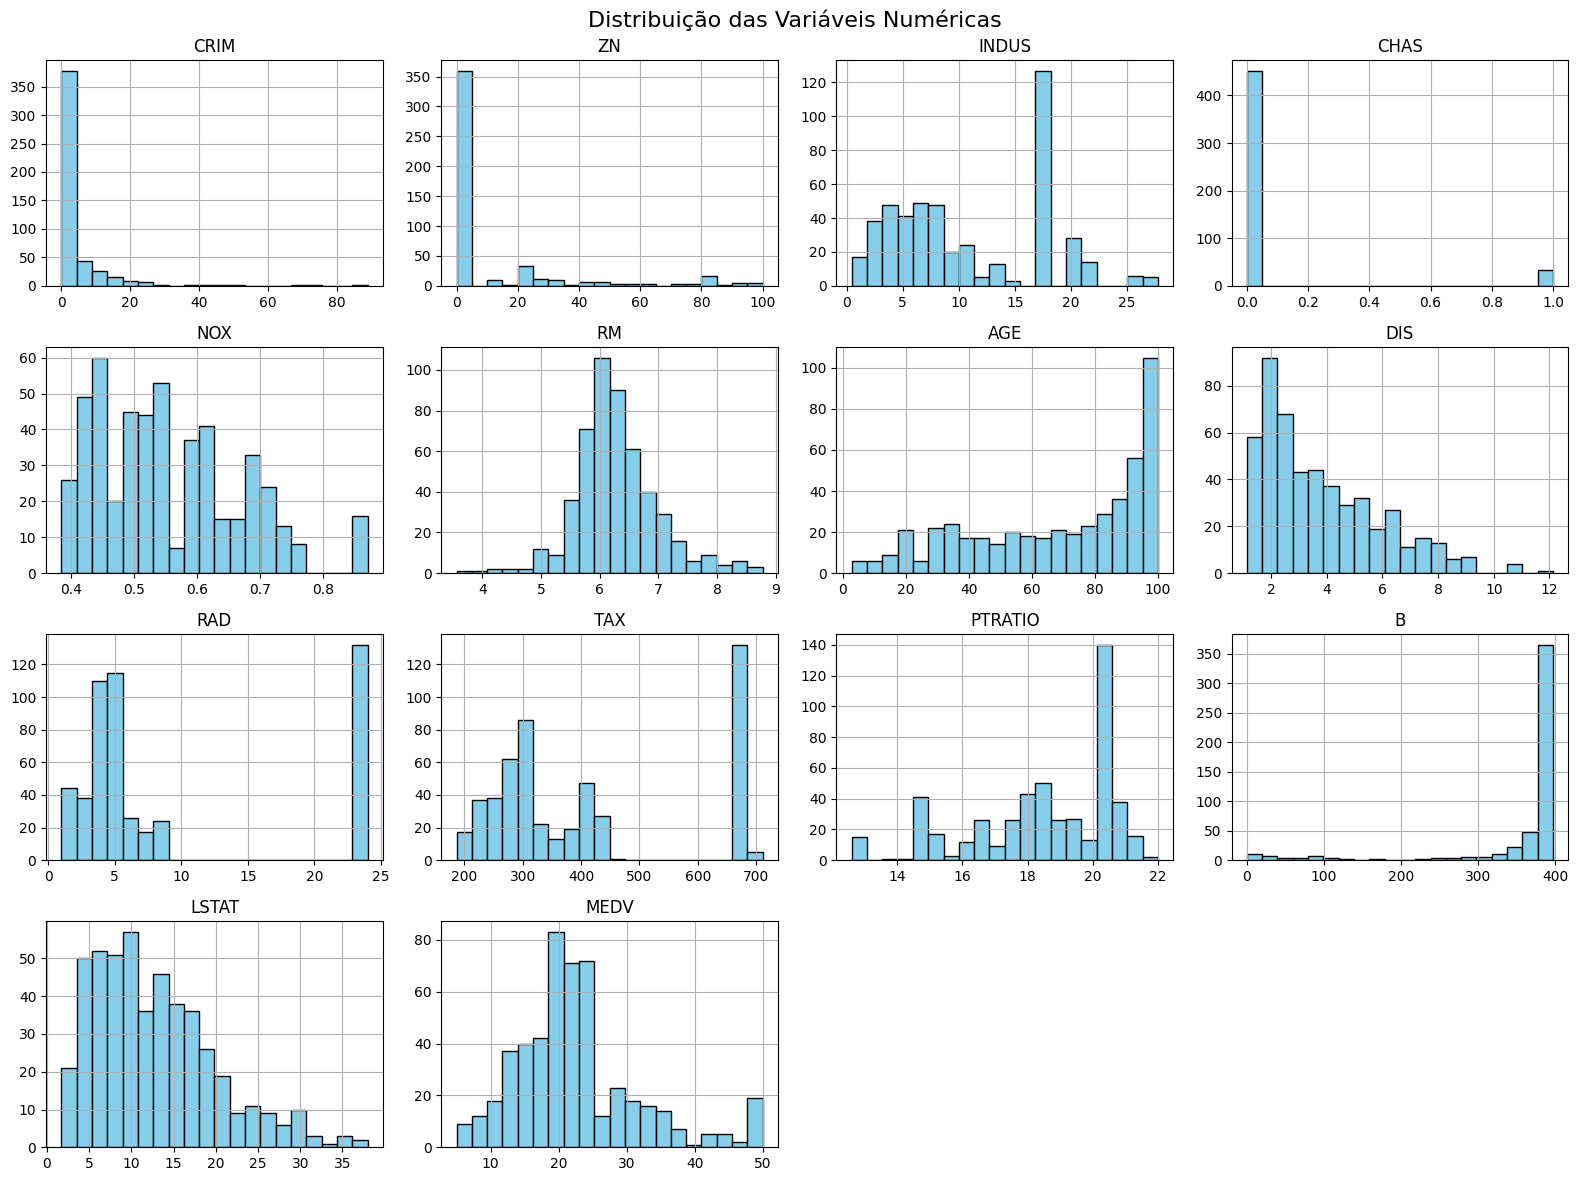

In [142]:
# Distribuição das variáveis numéricas
df.hist(bins=20, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16)
plt.tight_layout()
plt.show()


Analisando graficamente as distribuicoes das variaveis na base dados 

In [143]:
df.sort_values(by='CRIM', ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,NaN,0.0,18.1,0.0,0.597,6.852,100.0,1.4655,24,666,20.2,179.36,19.78,27.5
426,NaN,0.0,18.1,0.0,0.584,5.837,59.7,1.9976,24,666,20.2,24.65,15.69,10.2
430,NaN,0.0,18.1,0.0,0.584,6.348,86.1,2.0527,24,666,20.2,83.45,17.64,14.5
460,NaN,0.0,18.1,0.0,0.713,6.701,90.0,2.5975,24,666,20.2,255.23,16.42,16.4


ordenando pelo pela taxa da maior criminalidade

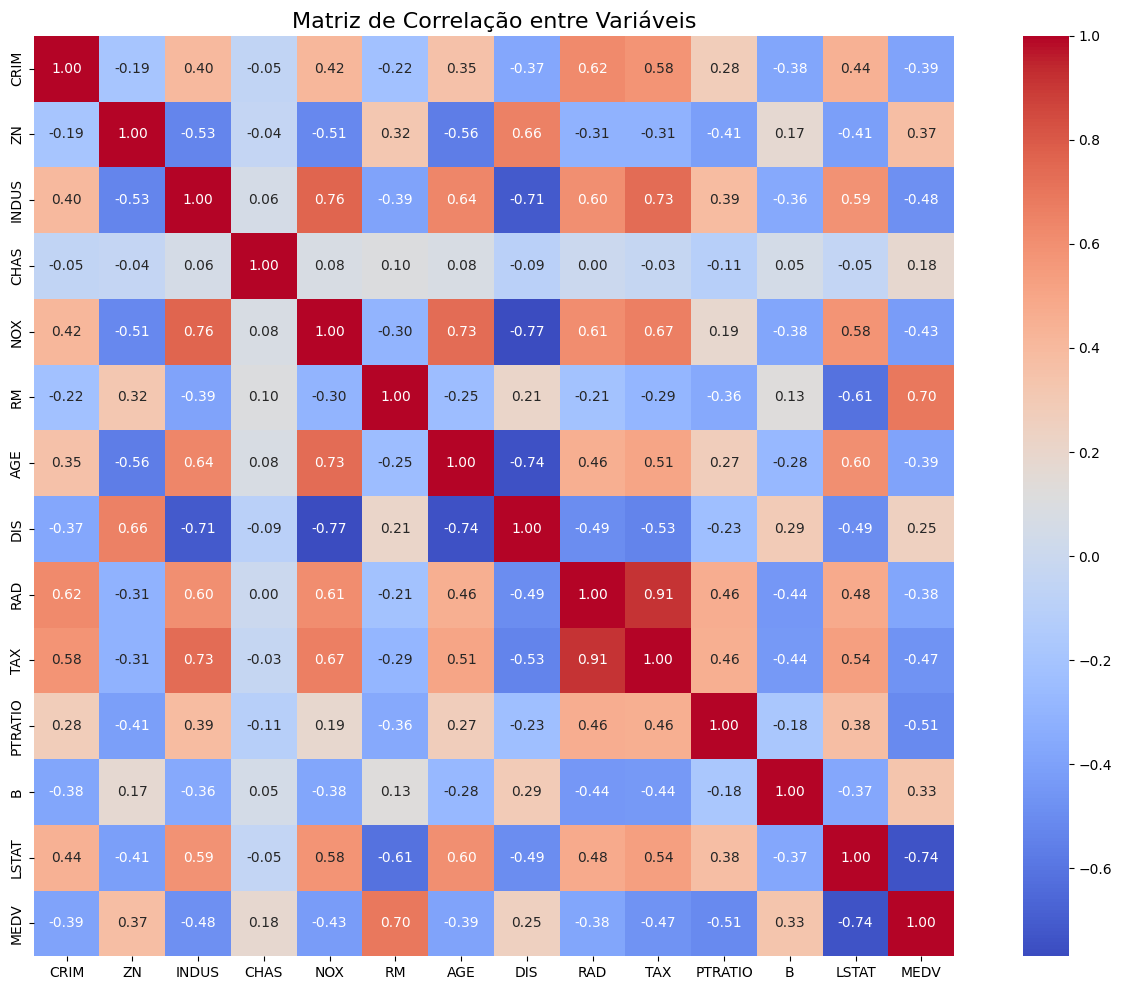

In [144]:
# Calcula a matriz de correlação
correlation_matrix = df.corr()


#gerando o mapa de calor para poder analisar melhor as correloes da base de dados e suas variaveis e como elas se relacionam
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlação entre Variáveis", fontsize=16)
plt.tight_layout()
plt.show()


nesse trecho utilizando o mapa de calor conseguimos verificar quais variaveis tem relacoes mais "quentes" entre elas , podendo assim saber quais sao os melhores dados a serem trabalhados

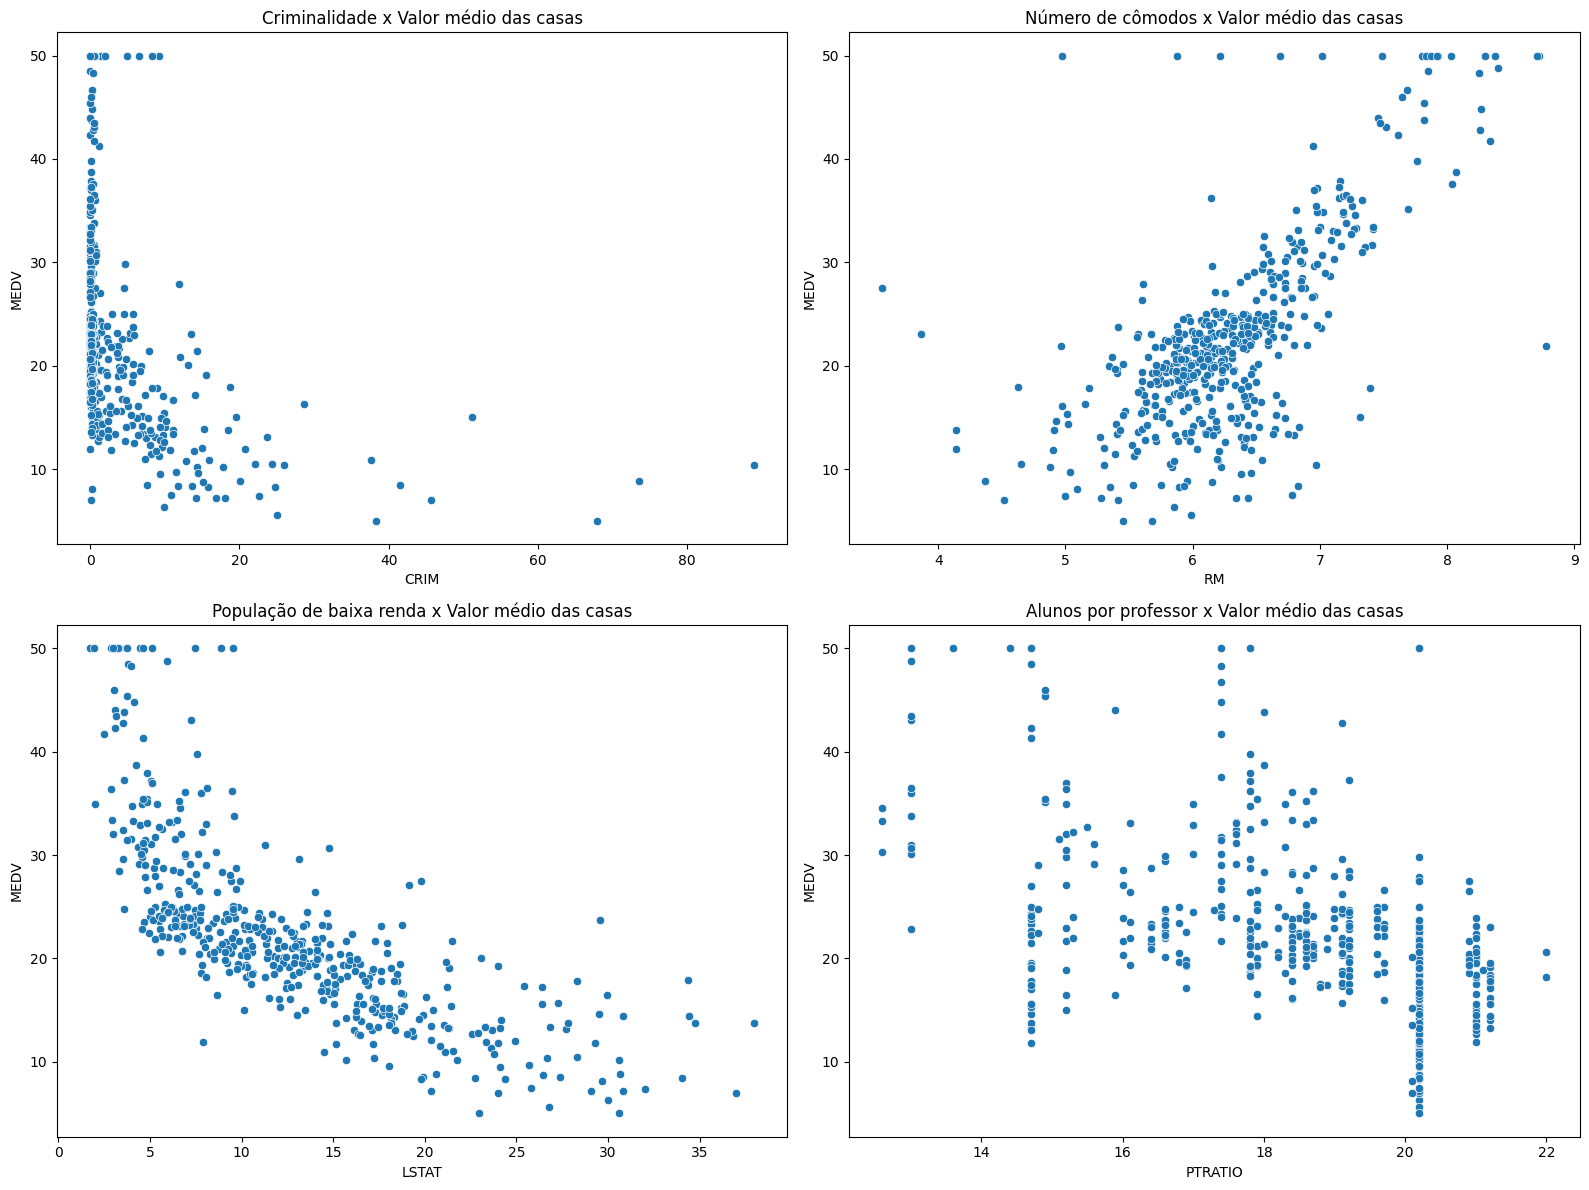

In [145]:
plt.figure(figsize=(16, 12))

# CRIMINALIDADE x VALOR MÉDIO DAS CASAS
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['CRIM'], y=df['MEDV'])
plt.title('Criminalidade x Valor médio das casas')
plt.xlabel('CRIM')
plt.ylabel('MEDV')

# CÔMODOS x VALOR MÉDIO DAS CASAS
plt.subplot(2, 2, 2)
sns.scatterplot(x=df['RM'], y=df['MEDV'])
plt.title('Número de cômodos x Valor médio das casas')
plt.xlabel('RM')
plt.ylabel('MEDV')

# POPULAÇÃO DE BAIXA RENDA x VALOR MÉDIO DAS CASAS
plt.subplot(2, 2, 3)
sns.scatterplot(x=df['LSTAT'], y=df['MEDV'])
plt.title('População de baixa renda x Valor médio das casas')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

# ALUNOS POR PROFESSOR x VALOR MÉDIO DAS CASAS
plt.subplot(2, 2, 4)
sns.scatterplot(x=df['PTRATIO'], y=df['MEDV'])
plt.title('Alunos por professor x Valor médio das casas')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')

plt.tight_layout()
plt.show()


O primeiro grafico mostra que as areas onde as taxas de criminalidades sao baixas costumam ser as areas com valores medios de casas mais alto.
O segundo grafico (da direita em cima ) mostra que as casas que tem maiores quantidades de comodos sao as que costumam ter os maiores valores medios.
O terceiro grafico(esquerda em baixo) mostra que areas com a maiores porcentagens de populacao de baixa renda (LSTAT) as casas tem menores valores , onde tem populacao de renda alta ou menos baixa , o valor medio das casas é mais alto.
No quarto e ultimo grafico , em areas escolares esta sendo analisado a quantidade de alunos por professores, mostrando que locais onde professores estao mais sobrecarregados o valor medio das casas sao menores por influencia dos estudos.

fim da parte de analise do EDA

Inicio da parte de preparacao dos dados e limpeza dos dados 

In [146]:
print(df.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [147]:
df = df.fillna(df.mean(numeric_only=True))
#valores estao sendo preenchidos com a media de cada coluna

In [148]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [149]:
# Separar X e y
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Normalização manual entre 0 e 1
X_normalizado = (X - X.min()) / (X.max() - X.min())

#normalizando a variavel Mediavalor para uso a frente do RNA


 Apos analises e verificando com base no mapa de calor, conseguimos definir quais variaveis sao boas para podermos utilizar dos treinamentos.
 As variaveis sao as seguintes lSTAT(BAIXA RENDA) QUE INFLUENCIA NO PREÇO DAS CASAS SEREM MENORES, RM(COMODOS NA CASA) INFLUENCIA NO VALOR DE QUANTO MAIS COMODOS MAIS CARO FICA A CASA, CRIM(CRIMINALIDADE DO LOCAL) QUANTO MAIOR A CRIMINALIDADE MENOR OS VALORES DA CASA,TAX(IMPOSTO) QUANTO MAIOR O IMPOSTO MENOR O PREÇO DA CASA E POSSIVELMENTE PODEREMOS USAR TAMBEM A INDUS(AREAS INDUSTRIAIS) SE TIVER MUITAS AREAS INDUSTRIAIS PROXIMAS MENOR O VALOR DO IMOVEL

In [150]:
# Criar novas variáveis a partir das colunas originais
df['RM_per_AGE'] = df['RM'] / (df['AGE'] + 1)
df['TAX_per_RM'] = df['TAX'] / (df['RM'] + 1)
df['CRIM_per_DIS'] = df['CRIM'] / (df['DIS'] + 1)
#variaveis que podem ajudar , apos testes subiram o coeficiente para 0,75 de 0,74
#pequena mudança porem algo significativo ja 

# Separar X (sem o MEDV)
X = df.drop('MEDV', axis=1)

# Normalizar todos os dados entre 0 e 1
X_normalizado = (X - X.min()) / (X.max() - X.min())

# Separar y (target)
y = df['MEDV']


Sobre balanceamento nao sera necessario balancear , pois vamos analisar um caso de regressão que estará prevendo o valor medio das casas que é continuo e nao uma classe

In [151]:
%pip install scikit-learn
#biblioteca usada para para machine learning

from sklearn.model_selection import train_test_split
#aqui separa os dados entre treino e testes
from sklearn.neural_network import MLPRegressor
#aqui uma rede neural utilizada para regressao , que é nosso caso para prever valores de casas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#metricas para avaliar o modelo 


# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.2, random_state=42)

# Criar e treinar a Rede Neural
rna = MLPRegressor(hidden_layer_sizes=(100,50), max_iter=1000, random_state=42)
#hidden é a quantidade de neurononios utilizadas, estamos aqui definindo a primeira camada com 100 e a segunda com 50
#o  mar_iter é a quantidade de vezes que a rede neural vai aprender no caso 1000
#random_state usado para garantir que os resultados sempre sejam os mesmos ,
# pq o train_test_split roda de forma aleatoria isso

rna.fit(X_train, y_train)
#a rede aprendendo a prever os valores de y com base no x


y_pred = rna.predict(X_test)
#prevendo os resultados dos testes e armazenando o resultado no Y_pred

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Erro absoluto médio): {mae:.2f}")
print(f"RMSE (Raiz do erro quadrático médio): {rmse:.2f}")
print(f"R² (Coeficiente de determinação): {r2:.2f}")



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\geize\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
MAE (Erro absoluto médio): 2.51
RMSE (Raiz do erro quadrático médio): 4.29
R² (Coeficiente de determinação): 0.75


In [ ]:
# 1. Importar o modelo Random Forest
from sklearn.ensemble import RandomForestRegressor

# 2. Criar o modelo com 100 árvores 
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 3. Treinar o modelo com os dados de treino
rf.fit(X_train, y_train)

# 4. Fazer previsões com os dados de teste
y_pred_rf = rf.predict(X_test)

# 5. Avaliar o desempenho do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_rf = mean_absolute_error(y_test, y_pred_rf)  # Erro absoluto médio
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))  # Raiz do erro quadrático médio
r2_rf = r2_score(y_test, y_pred_rf)  # Coeficiente de determinação (R²)

# 6. Exibir os resultados
print(f"MAE (Erro absoluto médio): {mae_rf:.2f}")
print(f"RMSE (Raiz do erro quadrático médio): {rmse_rf:.2f}")
print(f"R² (Coeficiente de determinação): {r2_rf:.2f}")


MAE (Erro absoluto médio): 2.09
RMSE (Raiz do erro quadrático médio): 2.85
R² (Coeficiente de determinação): 0.89


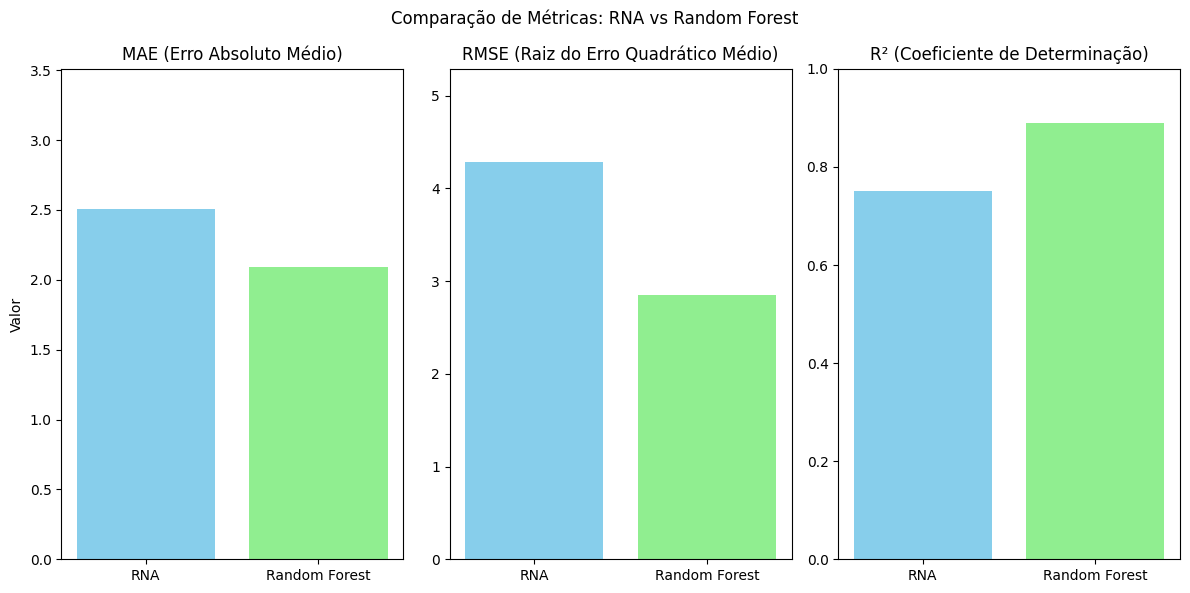

In [153]:
import matplotlib.pyplot as plt

# Nomes dos modelos
modelos = ['RNA', 'Random Forest']

# Métricas de desempenho (substitua pelos seus valores atuais se quiser)
mae_valores = [2.51, 2.09]
rmse_valores = [4.29, 2.85]
r2_valores = [0.75, 0.89]

# Tamanho da figura
plt.figure(figsize=(12, 6))

# Gráfico de MAE
plt.subplot(1, 3, 1)
plt.bar(modelos, mae_valores, color=['skyblue', 'lightgreen'])
plt.title('MAE (Erro Absoluto Médio)')
plt.ylabel('Valor')
plt.ylim(0, max(mae_valores) + 1)

# Gráfico de RMSE
plt.subplot(1, 3, 2)
plt.bar(modelos, rmse_valores, color=['skyblue', 'lightgreen'])
plt.title('RMSE (Raiz do Erro Quadrático Médio)')
plt.ylim(0, max(rmse_valores) + 1)

# Gráfico de R²
plt.subplot(1, 3, 3)
plt.bar(modelos, r2_valores, color=['skyblue', 'lightgreen'])
plt.title('R² (Coeficiente de Determinação)')
plt.ylim(0, 1)

# Título geral
plt.suptitle('Comparação de Métricas: RNA vs Random Forest')
plt.tight_layout()
plt.show()


Avaliando os modelos com as metricas para ver quais tem mais erro. 
1.Vemos que a Random Forest teve melhor desempenho que o modelo RNA sendo a mais precisa para a previsao dos valores das casas.
2.Acreditamos que o random Forest seja mais interpretavel pois conseguimos entender suas decisoes , que sao sempre pegar subconjuntos aleatorios , e pegando ao final a media de todas as arvores e tendo um valor final.
3.A RNA demorou mais a ser treinada para chegar em um resultado um pouco melhor que foi 0.75 com menos erros , tivemos que inserir mais neuronios na segunda camada para conseguir ter um bom resultado sendo preciso 1000 vezes treinada para um resultado bom , ja a RANDOM FOREST apos a criacao de 100 arvores ja teve um resultado bom.
4.Para a RNA funcionar teve que ser alterado alguns dados, como novas variaveis , adicao de uma segunda camada de neuronio e na RANDOM FOREST foi algo mais simples sem precisar de mudancas apenas as que ja tinham sido feitas porem ficamos em 100 arvores para nao correr risco de ao inves de melhorar piorar 